In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Import
1. On-time performance
2. Daily weather data (pending)
3. Traffic/construction data (pending)

In [2]:
DF = pd.read_csv("../datasets/on_time.csv",low_memory=False)
DF

,Row ID,Stop Number,Route Number,Route Name,Route Destination,Day Type,Scheduled Time,Deviation,Location
0,838791619,30893,71,Arlington,Portage via Sinclair,Weekday,2021-08-03T12:57:00,-83,POINT (-97.1487003222228 49.9583003868781)
1,838791621,30894,71,Arlington,Portage via Sinclair,Weekday,2021-08-03T12:57:47,-131,POINT (-97.14473223771209 49.957067630945396)
2,838791623,30884,71,Arlington,Portage via Sinclair,Weekday,2021-08-03T12:58:20,-112,POINT (-97.14591991330629 49.9555484932656)
3,838791626,30377,71,Arlington,Portage via Sinclair,Weekday,2021-08-03T13:00:00,-128,POINT (-97.1452473007769 49.9523715211324)
4,838791628,30378,71,Arlington,Portage via Sinclair,Weekday,2021-08-03T13:01:02,-277,POINT (-97.1409297615775 49.9511780159218)
...,...,...,...,...,...,...,...,...,...
4264663,856899198,40043,47,Transcona - Pembina,Transcona via Regent,Weekday,2021-08-17T10:26:36,-252,POINT (-96.99292649366559 49.89504583500769)
4264664,856899200,40037,47,Transcona - Pembina,Transcona via Regent,Weekday,2021-08-17T10:27:13,-248,POINT (-96.9891662035126 49.8950616196603)
4264665,856899202,40031,47,Transcona - Pembina,Transcona via Regent,Weekday,2021-08-17T10:27:42,-248,POINT (-96.9867783593948 49.895892701349496)
4264666,856899204,40029,47,Transcona - Pembina,Transcona via Regent,Weekday,2021-08-17T10:28:03,-240,POINT (-96.9846475305137 49.8959006485947)


In [3]:
for col in DF.columns:
    print(col,DF[col].dtype)

Row ID int64
Stop Number int64
Route Number object
Route Name object
Route Destination object
Day Type object
Scheduled Time object
Deviation int64
Location object


# Data Preprocessing
1. Remove Row ID
2. Convert Scheduled Time column to DateTime format
3. Convert Location column to tuple
4. Group Route Name and Route Destination into a single column 
5. Add Delay Type (Early, On-time, Short, Medium, Long, Severe, Crippling)

In [4]:
# 1
DF = DF.drop(columns="Row ID")
DF

,Stop Number,Route Number,Route Name,Route Destination,Day Type,Scheduled Time,Deviation,Location
0,30893,71,Arlington,Portage via Sinclair,Weekday,2021-08-03T12:57:00,-83,POINT (-97.1487003222228 49.9583003868781)
1,30894,71,Arlington,Portage via Sinclair,Weekday,2021-08-03T12:57:47,-131,POINT (-97.14473223771209 49.957067630945396)
2,30884,71,Arlington,Portage via Sinclair,Weekday,2021-08-03T12:58:20,-112,POINT (-97.14591991330629 49.9555484932656)
3,30377,71,Arlington,Portage via Sinclair,Weekday,2021-08-03T13:00:00,-128,POINT (-97.1452473007769 49.9523715211324)
4,30378,71,Arlington,Portage via Sinclair,Weekday,2021-08-03T13:01:02,-277,POINT (-97.1409297615775 49.9511780159218)
...,...,...,...,...,...,...,...,...
4264663,40043,47,Transcona - Pembina,Transcona via Regent,Weekday,2021-08-17T10:26:36,-252,POINT (-96.99292649366559 49.89504583500769)
4264664,40037,47,Transcona - Pembina,Transcona via Regent,Weekday,2021-08-17T10:27:13,-248,POINT (-96.9891662035126 49.8950616196603)
4264665,40031,47,Transcona - Pembina,Transcona via Regent,Weekday,2021-08-17T10:27:42,-248,POINT (-96.9867783593948 49.895892701349496)
4264666,40029,47,Transcona - Pembina,Transcona via Regent,Weekday,2021-08-17T10:28:03,-240,POINT (-96.9846475305137 49.8959006485947)


In [5]:
# 2
DF['Scheduled Time'] = pd.to_datetime(DF['Scheduled Time'].str.replace('T',' '))
print(DF['Scheduled Time'].dtype)
DF

datetime64[ns]


,Stop Number,Route Number,Route Name,Route Destination,Day Type,Scheduled Time,Deviation,Location
0,30893,71,Arlington,Portage via Sinclair,Weekday,2021-08-03 12:57:00,-83,POINT (-97.1487003222228 49.9583003868781)
1,30894,71,Arlington,Portage via Sinclair,Weekday,2021-08-03 12:57:47,-131,POINT (-97.14473223771209 49.957067630945396)
2,30884,71,Arlington,Portage via Sinclair,Weekday,2021-08-03 12:58:20,-112,POINT (-97.14591991330629 49.9555484932656)
3,30377,71,Arlington,Portage via Sinclair,Weekday,2021-08-03 13:00:00,-128,POINT (-97.1452473007769 49.9523715211324)
4,30378,71,Arlington,Portage via Sinclair,Weekday,2021-08-03 13:01:02,-277,POINT (-97.1409297615775 49.9511780159218)
...,...,...,...,...,...,...,...,...
4264663,40043,47,Transcona - Pembina,Transcona via Regent,Weekday,2021-08-17 10:26:36,-252,POINT (-96.99292649366559 49.89504583500769)
4264664,40037,47,Transcona - Pembina,Transcona via Regent,Weekday,2021-08-17 10:27:13,-248,POINT (-96.9891662035126 49.8950616196603)
4264665,40031,47,Transcona - Pembina,Transcona via Regent,Weekday,2021-08-17 10:27:42,-248,POINT (-96.9867783593948 49.895892701349496)
4264666,40029,47,Transcona - Pembina,Transcona via Regent,Weekday,2021-08-17 10:28:03,-240,POINT (-96.9846475305137 49.8959006485947)


In [6]:
# 3
def __clean_string(df):
    to_repl = ''
    for pat in ["POINT (",")"]:
        df = df.str.replace(pat,to_repl,regex=False)
    df = df.str.split()
    return df

def as_dtype(lst,dtype):
    if isinstance(lst,(list,tuple)):
        return type(lst)([dtype(i) for i in lst])
    else: return lst

DF['Location'] = __clean_string(DF['Location'])
DF.loc[:,['Long','Lat']] = [as_dtype(i,float) for i in DF['Location'].values]
DF = DF.drop(columns="Location")
DF

,Stop Number,Route Number,Route Name,Route Destination,Day Type,Scheduled Time,Deviation,Long,Lat
0,30893,71,Arlington,Portage via Sinclair,Weekday,2021-08-03 12:57:00,-83,-97.148700,49.958300
1,30894,71,Arlington,Portage via Sinclair,Weekday,2021-08-03 12:57:47,-131,-97.144732,49.957068
2,30884,71,Arlington,Portage via Sinclair,Weekday,2021-08-03 12:58:20,-112,-97.145920,49.955548
3,30377,71,Arlington,Portage via Sinclair,Weekday,2021-08-03 13:00:00,-128,-97.145247,49.952372
4,30378,71,Arlington,Portage via Sinclair,Weekday,2021-08-03 13:01:02,-277,-97.140930,49.951178
...,...,...,...,...,...,...,...,...,...
4264663,40043,47,Transcona - Pembina,Transcona via Regent,Weekday,2021-08-17 10:26:36,-252,-96.992926,49.895046
4264664,40037,47,Transcona - Pembina,Transcona via Regent,Weekday,2021-08-17 10:27:13,-248,-96.989166,49.895062
4264665,40031,47,Transcona - Pembina,Transcona via Regent,Weekday,2021-08-17 10:27:42,-248,-96.986778,49.895893
4264666,40029,47,Transcona - Pembina,Transcona via Regent,Weekday,2021-08-17 10:28:03,-240,-96.984648,49.895901


In [7]:
# 4
DF['Route'] = tuple([tuple(val) for val in DF[['Route Number','Route Name','Route Destination']].values])
DF = DF.drop(columns=['Route Name','Route Destination'])
DF

,Stop Number,Route Number,Day Type,Scheduled Time,Deviation,Long,Lat,Route
0,30893,71,Weekday,2021-08-03 12:57:00,-83,-97.148700,49.958300,"(71, Arlington, Portage via Sinclair)"
1,30894,71,Weekday,2021-08-03 12:57:47,-131,-97.144732,49.957068,"(71, Arlington, Portage via Sinclair)"
2,30884,71,Weekday,2021-08-03 12:58:20,-112,-97.145920,49.955548,"(71, Arlington, Portage via Sinclair)"
3,30377,71,Weekday,2021-08-03 13:00:00,-128,-97.145247,49.952372,"(71, Arlington, Portage via Sinclair)"
4,30378,71,Weekday,2021-08-03 13:01:02,-277,-97.140930,49.951178,"(71, Arlington, Portage via Sinclair)"
...,...,...,...,...,...,...,...,...
4264663,40043,47,Weekday,2021-08-17 10:26:36,-252,-96.992926,49.895046,"(47, Transcona - Pembina, Transcona via Regent)"
4264664,40037,47,Weekday,2021-08-17 10:27:13,-248,-96.989166,49.895062,"(47, Transcona - Pembina, Transcona via Regent)"
4264665,40031,47,Weekday,2021-08-17 10:27:42,-248,-96.986778,49.895893,"(47, Transcona - Pembina, Transcona via Regent)"
4264666,40029,47,Weekday,2021-08-17 10:28:03,-240,-96.984648,49.895901,"(47, Transcona - Pembina, Transcona via Regent)"


Delay types:
- Early: < -2 min
- On-time: Within -2 min - <2 min
- Short delay: 2 min - <10 min,
- Medium delay: 10 min - <30 min,
- Long delay: 30 min - <60 min,
- Severe delay: 60+ min

In [8]:
# 5 
MIN = 60
dev = DF['Deviation'].copy()
delay_types = {
    'early':    (dev < -2*MIN),
    'on-time':  (-2*MIN <= dev) & (dev < 2*MIN),
    'short' :   (2*MIN <= dev)  & (dev < 10*MIN),
    'medium' :  (10*MIN <= dev) & (dev < 30*MIN),
    'long' :    (30*MIN <= dev) & (dev < 60*MIN),
    'severe' :  (dev >= 60*MIN),
}

for delay_type,cond in delay_types.items():
    type_index = dev[cond].dropna().index
    DF.loc[type_index,'Delay Type'] = delay_type
DF


,Stop Number,Route Number,Day Type,Scheduled Time,Deviation,Long,Lat,Route,Delay Type
0,30893,71,Weekday,2021-08-03 12:57:00,-83,-97.148700,49.958300,"(71, Arlington, Portage via Sinclair)",on-time
1,30894,71,Weekday,2021-08-03 12:57:47,-131,-97.144732,49.957068,"(71, Arlington, Portage via Sinclair)",early
2,30884,71,Weekday,2021-08-03 12:58:20,-112,-97.145920,49.955548,"(71, Arlington, Portage via Sinclair)",on-time
3,30377,71,Weekday,2021-08-03 13:00:00,-128,-97.145247,49.952372,"(71, Arlington, Portage via Sinclair)",early
4,30378,71,Weekday,2021-08-03 13:01:02,-277,-97.140930,49.951178,"(71, Arlington, Portage via Sinclair)",early
...,...,...,...,...,...,...,...,...,...
4264663,40043,47,Weekday,2021-08-17 10:26:36,-252,-96.992926,49.895046,"(47, Transcona - Pembina, Transcona via Regent)",early
4264664,40037,47,Weekday,2021-08-17 10:27:13,-248,-96.989166,49.895062,"(47, Transcona - Pembina, Transcona via Regent)",early
4264665,40031,47,Weekday,2021-08-17 10:27:42,-248,-96.986778,49.895893,"(47, Transcona - Pembina, Transcona via Regent)",early
4264666,40029,47,Weekday,2021-08-17 10:28:03,-240,-96.984648,49.895901,"(47, Transcona - Pembina, Transcona via Regent)",early


# Simple Visualization
1. Dates of record
2. Routes and Bus stops
3. Bus On-time performance
4. Locations (pending)

In [9]:
df = DF.copy()

## 1. Dates of records

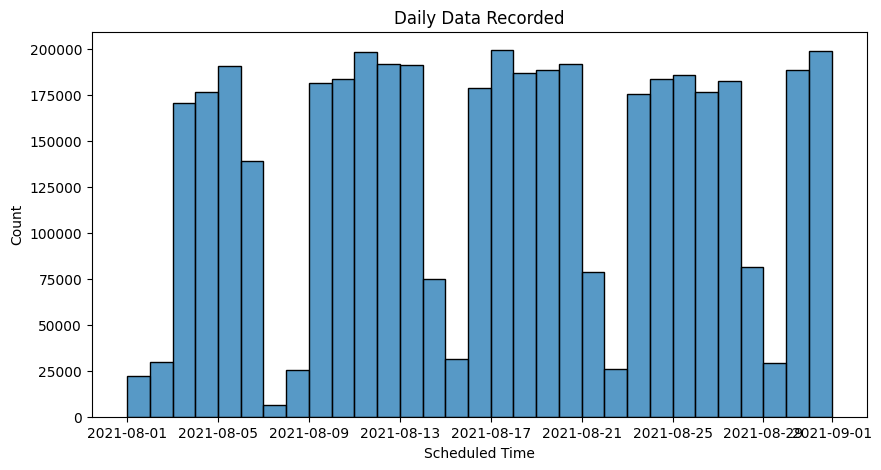

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(df,x='Scheduled Time',binwidth=1)
plt.title("Daily Data Recorded")
plt.show()

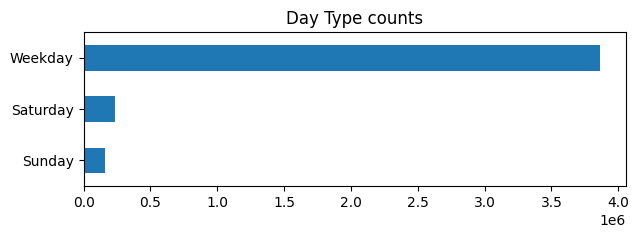

In [11]:
plt.figure(figsize=(7,2))
ax3 = df['Day Type'].value_counts()[::-1].plot.barh()
ax3.set_title(f"Day Type counts")
plt.show()

## 2. Routes and Bus stops

In [12]:
DF_STOP_NUMBER = df[["Stop Number","Long","Lat"]].drop_duplicates().set_index("Stop Number")
DF_STOP_NUMBER

,Long,Lat
Stop Number,,
30893,-97.148700,49.958300
30894,-97.144732,49.957068
30884,-97.145920,49.955548
30377,-97.145247,49.952372
30378,-97.140930,49.951178
...,...,...
40561,-97.077978,49.940581
40564,-97.073245,49.939027
40566,-97.070178,49.937996


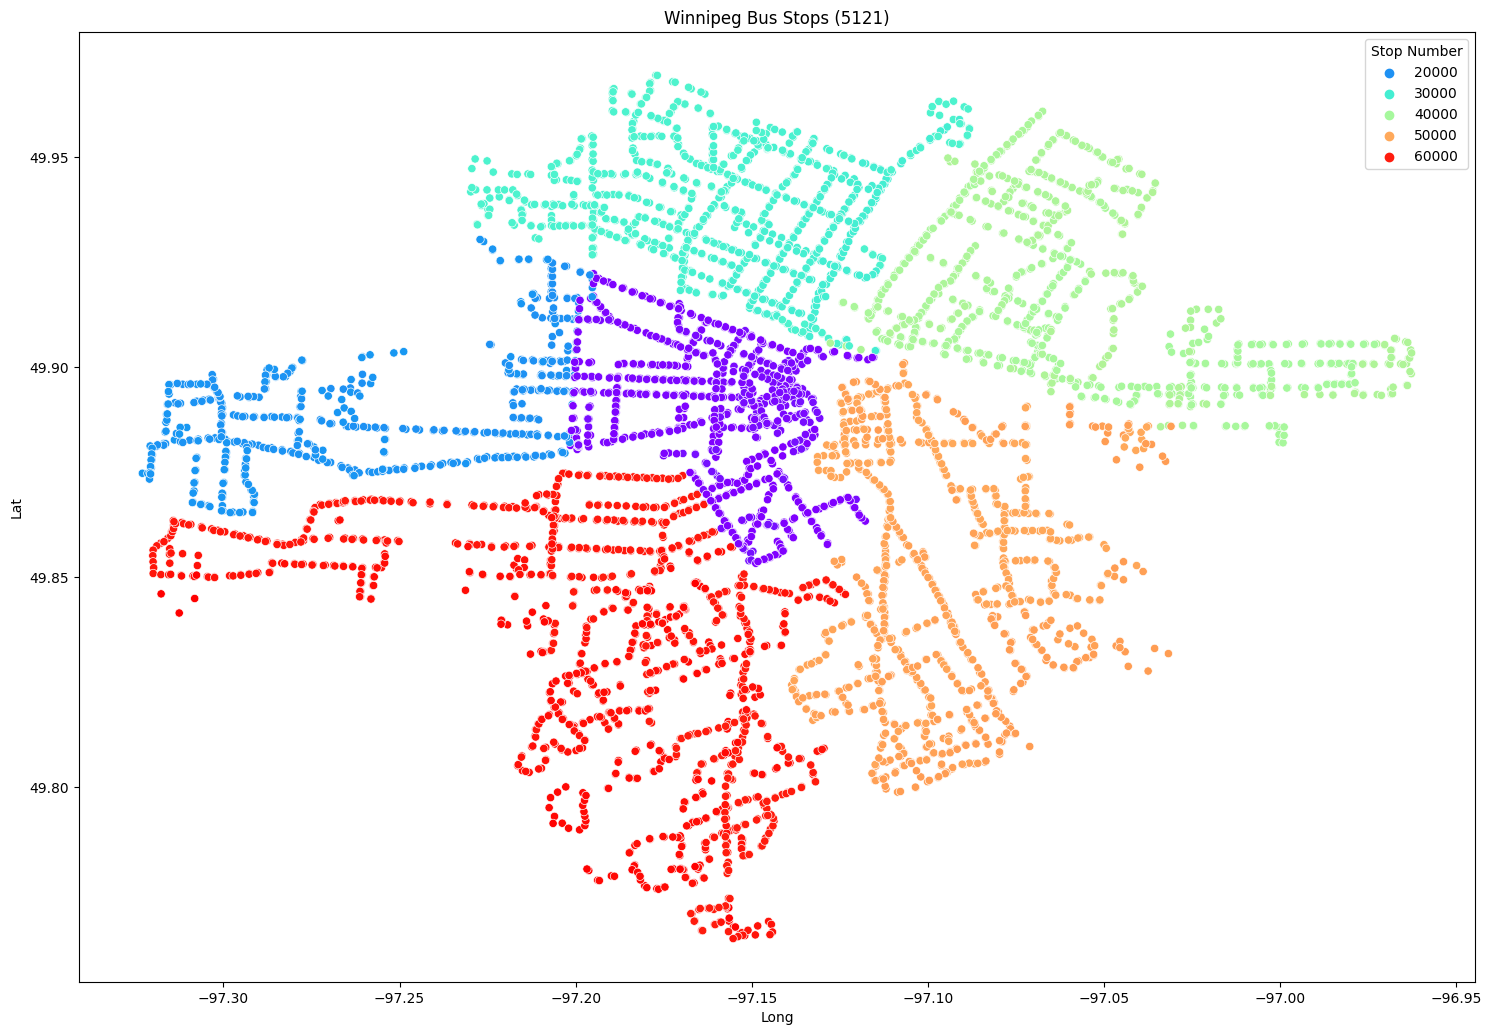

In [13]:
SIZE = 50
lg,lt = DF_STOP_NUMBER[["Long","Lat"]].max() - DF_STOP_NUMBER[["Long","Lat"]].min()
plt.figure(figsize=(SIZE*lg,(SIZE*1.2)*lt))
sns.scatterplot(data=DF_STOP_NUMBER.reset_index(),x='Long',y='Lat',hue='Stop Number',palette="rainbow",marker='o') #'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd'
plt.title(f"Winnipeg Bus Stops ({len(DF_STOP_NUMBER)})")
plt.show()

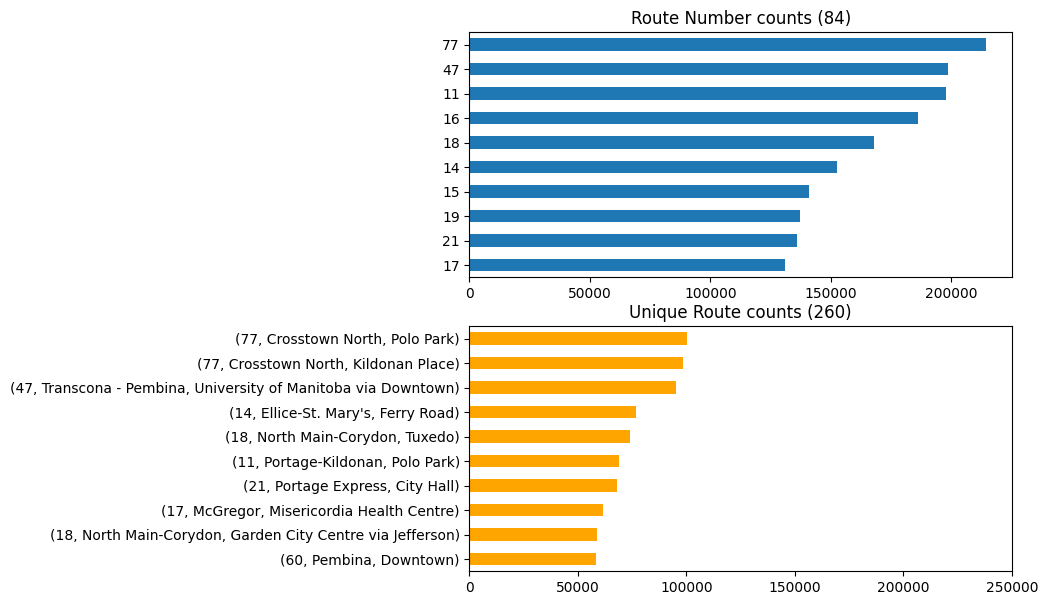

In [14]:
plt.figure(figsize=(7,7))
n = 10
plt.subplot(211)
ax1 = df['Route Number'].value_counts()[:n][::-1].plot.barh()
ax1.set_title(f"Route Number counts ({len(df['Route Number'].value_counts())})")
plt.subplot(212)
ax2 = df['Route'].value_counts()[:n][::-1].plot.barh(color='orange')
ax2.set_xticks(ax1.get_xticks())
ax2.set_title(f"Unique Route counts ({len(df['Route'].value_counts())})")
plt.show()

In [15]:
d = {}
d_final = {}
prv_rt = ''
rt_seq = []
for stp,rt in df[['Stop Number','Route']].values:
    # If new sequence:
    if rt != prv_rt and prv_rt != '':
        # Conclude the old seq
        if prv_rt not in d_final.keys():
            if prv_rt in d.keys() and tuple(rt_seq) == tuple(d[prv_rt]):
                d_final[prv_rt] = rt_seq
            else:
                d[prv_rt] = rt_seq
        # Prepare for new seq
        rt_seq = []
    rt_seq.append(stp)
    prv_rt = rt
if prv_rt not in d_final.keys():
    if prv_rt in d.keys() and rt_seq == d[rt]:
        d_final[prv_rt] = rt_seq
DF_RT_SEQ = pd.DataFrame(d_final.items(),columns=["Route","Stop Sequence"]).sort_values("Route")
DF_RT_SEQ


,Route,Stop Sequence
145,"(10, St. Boniface-Wolseley, Downtown)","[50230, 50227, 50226, 50223, 50221, 50205, 502..."
131,"(10, St. Boniface-Wolseley, St. Boniface via P...","[10232, 10230, 10228, 11054, 10874, 10205, 102..."
85,"(10, St. Boniface-Wolseley, St. Boniface via T...","[10230, 10228, 11054, 10874, 10205, 10202, 102..."
165,"(10, St. Boniface-Wolseley, Wolseley)","[10541, 10542, 10527, 10138, 10699, 10700, 105..."
86,"(10, St. Boniface-Wolseley, Wolseley via Tache)","[50230, 50227, 50226, 50223, 50221, 50205, 502..."
...,...,...
62,"(97, Inkster Industrial Park - Point Douglas, ...","[40852, 30545, 30628, 30777, 30094, 30821, 307..."
63,"(97, Inkster Industrial Park - Point Douglas, ...","[30542, 30547, 30887, 30888, 30832, 30554, 305..."
0,"(BLUE, Route BLUE, Downtown)","[60675, 60105, 60103, 61255, 61214, 61212, 612..."
64,"(BLUE, Route BLUE, St. Norbert)","[10831, 10838, 10132, 10134, 10618, 10616, 106..."


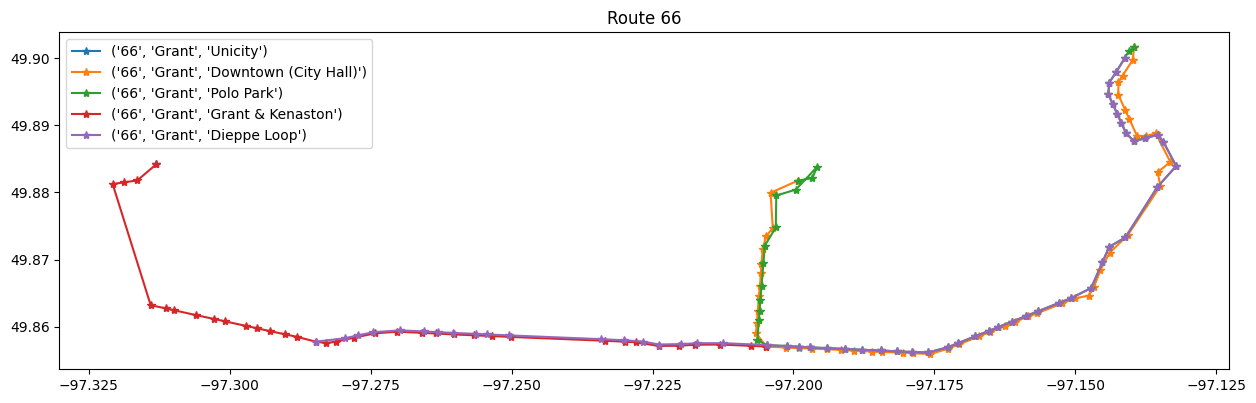

In [16]:
SIZE = 80
route_number = '66'
df2 = DF_RT_SEQ.set_index("Route").loc[pd.unique(df[df["Route Number"] == route_number]["Route"])].reset_index()
lg,lt = df[df["Route Number"] == route_number][["Long","Lat"]].max() - df[df["Route Number"] == route_number][["Long","Lat"]].min()
plt.figure(figsize=(SIZE*lg,(SIZE*1.2)*lt))
for route,seq in zip(df2["Route"],df2["Stop Sequence"]):
        coords_i = DF_STOP_NUMBER.loc[pd.Index(seq)]
        plt.plot(coords_i['Long'],coords_i['Lat'],'-*',label=route)
plt.legend()
plt.title(f"Route {route_number}")
plt.show()

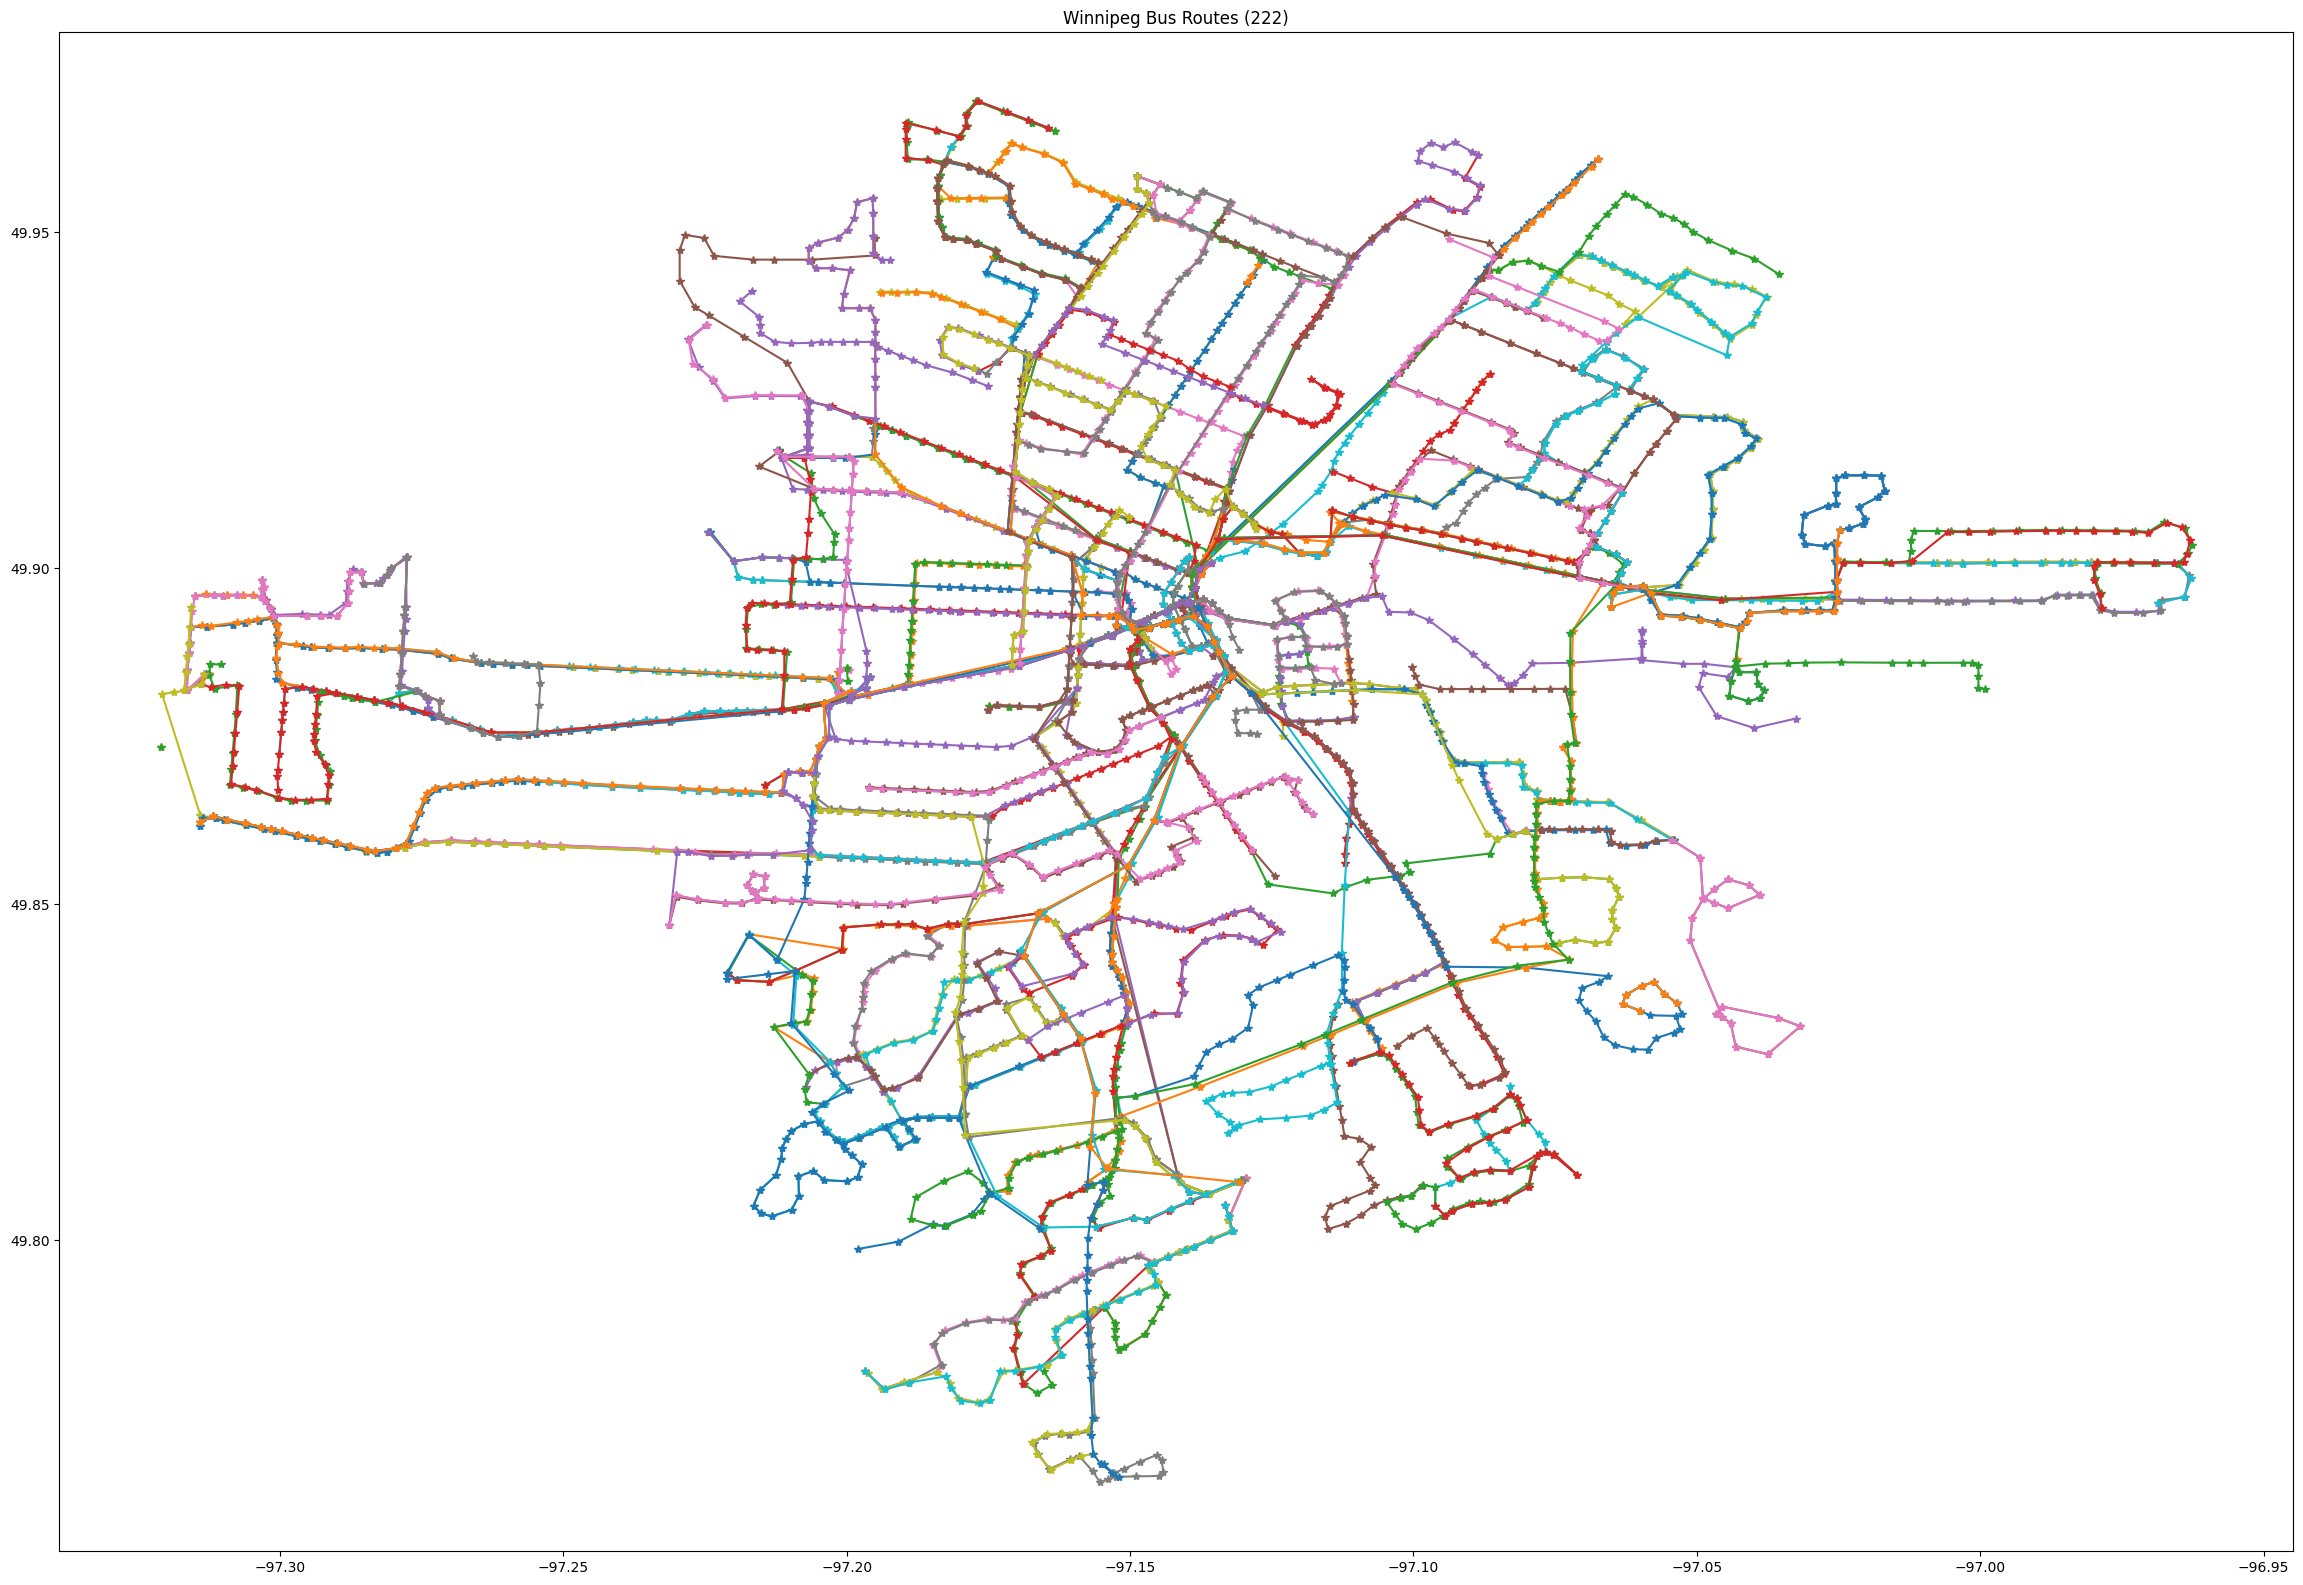

In [27]:
SIZE = 80
lg,lt = DF_STOP_NUMBER[["Long","Lat"]].max() - DF_STOP_NUMBER[["Long","Lat"]].min()
plt.figure(figsize=(SIZE*lg,(SIZE*1.2)*lt))
for route,seq in zip(DF_RT_SEQ["Route"],DF_RT_SEQ["Stop Sequence"]):
        coords_i = DF_STOP_NUMBER.loc[pd.Index(seq)]
        plt.plot(coords_i['Long'],coords_i['Lat'],'-*',label=route)
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.55), ncol=5, fancybox=True, shadow=False)
plt.title(f"Winnipeg Bus Routes ({len(DF_RT_SEQ)})")
plt.show()

## 3. Bus On-time Performance

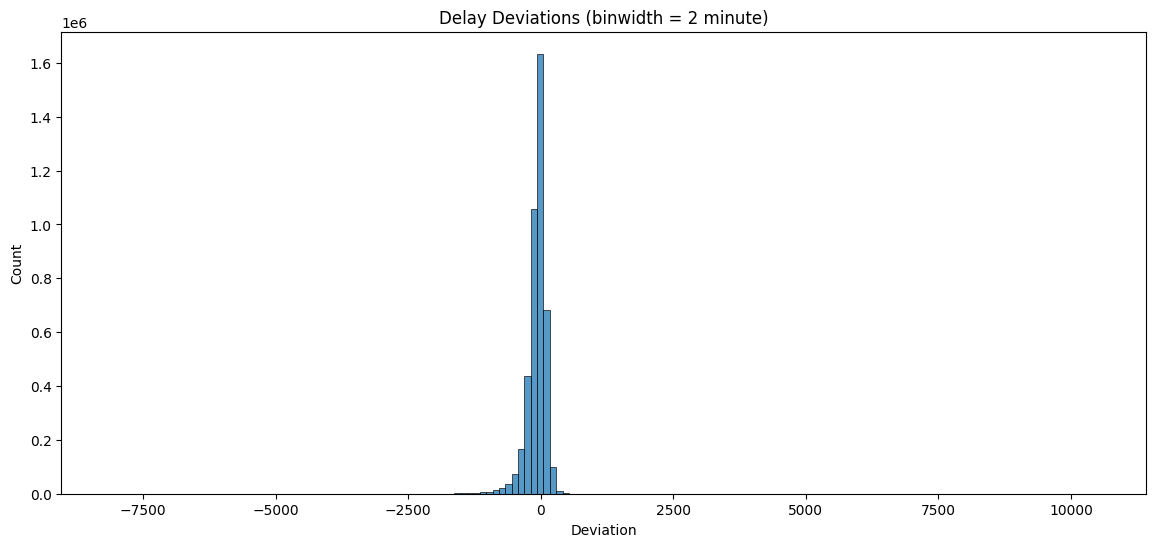

In [18]:
plt.figure(figsize=(14,6))
sns.histplot(df['Deviation'],binwidth=2*MIN)
plt.title("Delay Deviations (binwidth = 2 minute)")
plt.show()

Delay types:
- Early: < -2 min
- On-time: Within -2 min - <2 min
- Short delay: 2 min - <10 min,
- Medium delay: 10 min - <30 min,
- Long delay: 30 min - <60 min,
- Severe delay: 60+ min

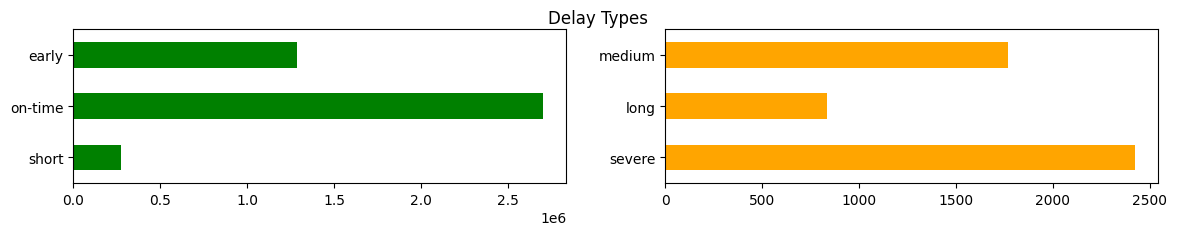

Delay Types, in %:


early      30.113106
on-time    63.329783
short       6.439212
medium      0.041527
long        0.019556
severe      0.056816
Name: Delay Type, dtype: float64

In [19]:
plt.figure(figsize=(14,2))
col = list(delay_types.keys())
plt.subplot(121)
ax4a = df['Delay Type'].value_counts().loc[col][2::-1].plot.barh(color="green")
plt.subplot(122)
ax4a = df['Delay Type'].value_counts().loc[col][:2:-1].plot.barh(color="orange")
plt.suptitle("Delay Types")
plt.show()

print("Delay Types, in %:")
df['Delay Type'].value_counts().loc[col]/len(df)*100